

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

In [64]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [16]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])
#print(GPU1,GPU2)
t_statistic, p_value = ttest_ind(GPU1, GPU2)
print(t_statistic, p_value)
print ("For the below given data set =",p_value," as it  less than 0.05 it can be rejected")

[-2.62762951] [0.01379428]
For the below given data set = [0.01379428]  as it  less than 0.05 it can be rejected


[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [35]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [36]:
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print(t_statistic, p_value)
print ("For the below given data set =",p_value," as it  more than 0.05 it will not be rejected")

[-1.49889438] [0.14509211]
For the below given data set = [0.14509211]  as it  less than 0.05 it can be rejected


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway,binom
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

print(levene(e1[0],e2[0],e3[0]))

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)


Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [60]:

f, p = f_oneway(e1,e2,e3)

print ('F value:', f)
print ('P value:', p, '\n')


 

F value: [2.51357623]
P value: [0.13574645] 



## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [0]:
Type I error 
When the null hypothesis is true and it is to be reject it, you make a type I error. 
The probability of making a type I error is α, which is the level of significance you set for your hypothesis test. 
An α of 0.05 indicates that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis.
To lower this risk, you must use a lower value for α.
However, using a lower value for alpha means that you will be less likely to detect a true difference if one really exists. 

In [0]:
Type II error 
When the null hypothesis is false and you fail to reject it,  it is a type II error.
The probability of making a type II error is β, which depends on the power of the test. 
You can decrease your risk of committing a type II error by ensuring your test has enough power. 
You can do this by ensuring your sample size is large enough to detect a practical difference when one truly exists.

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [0]:
# Step1:The null hypothesis is that the Population mean has been not changed from its previous value of 4.5 minutes: HO  U =4.5

In [0]:
#The  alternative hypothesis is the Oppsite of the null hypothesis,the alternative hypotesis is that the Population mean is  not
4.5 minutes  H1 != 4.5

#Step 2: Select a sample of n = 25.The level of  significance is .05 
#Step 3:Because Sigma is known, we can use normal distribution and the Z test static
#Step 4:Because ALpha is 0.05,the critical value of the Z statistic are  -1.96 and +1.96.The Rejection region is  Z <-1.96 to +1.96>

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [13]:
 n = 10
 p = 0.7
k = [0, 1, 2, 3, 4, 5, 6, 7]
binom.pmf(k,n,p)

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01])

# Question 7 
Plot the distribution created in the above question.

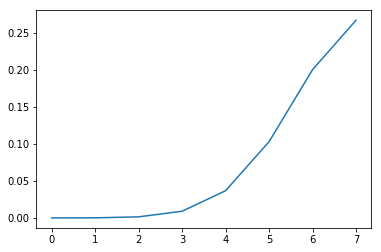

In [16]:
plt.plot(binom.pmf(k,n,p))

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [61]:
Bigcity = pd.read_csv('bigcity.csv')

Bigcity.info()
Bigcity.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Unnamed: 0    49 non-null int64
u             49 non-null int64
x             49 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


(49, 3)

# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [62]:
Bigcity = Bigcity.drop('Unnamed: 0',axis=1)
Bigcity

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


In [71]:
X = Bigcity[["u"]]
Y = Bigcity[["x"]]
Bigcity

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

In [66]:
Bigcity.isna()

,u,x
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [67]:
Bigcity.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [75]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
lm = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=100)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [86]:
a= lm.coef_

In [87]:
b= lm.intercept_

Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

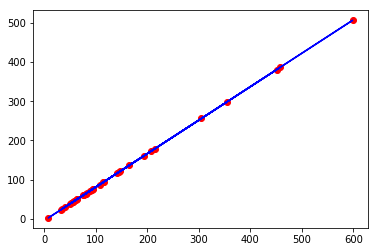

In [88]:
#y_pred = lm.predict(x_test)
y= a*x_train+b
plt.scatter(y,x_train,color='Red')
plt.plot(y,x_train,color='blue')

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [82]:
y_pred = lm.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt



mse = mean_squared_error(y_test,y_pred)

rmse = sqrt(mse)

print(rmse)

22.449425723889757


## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [83]:
lm.score(x_test,y_test)

0.8835107256007827

In [85]:
lm.score(x_train,y_train)

0.969240339775823